## Create plot for H.pylori vs. all other
Date: 11/1/2024  
Goal: To make the varied HP plots

#### Imports

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
from math import log10

#### Functions

In [3]:
def plotting(df, df2, df3, df4, df5):
    
    pyplot.cla() #Clears previous plot - to avoid double keys

    #Prepare results plot
    pyplot.xlabel('Mean relative abundance across samples', fontsize=18)
    pyplot.xscale('log')
    x_range = np.logspace(log10(min(df['mean_abundance'])/10), 0, 1000)
    pyplot.xlim(min(x_range), max(x_range))
    pyplot.xticks(fontsize=16)
    pyplot.ylabel('Occurrence frequency in samples', fontsize=18)
    pyplot.ylim(-0.05, 1.05)
    pyplot.yticks(fontsize=16)
  
    #Plot H.pylori
    #pyplot.plot([0.000743], [0.130435], 'o', markersize=2, fillstyle='full', color='magenta')
    pyplot.plot([0.00092], [0.142857], 'o', markersize=2, fillstyle='full', color='magenta')

    #Set Marker size
    markersize = 2

    # Plot data points
    pyplot.plot(df['mean_abundance'], df['occurrence'], 'o', markersize=markersize, fillstyle='full', color='black')
    pyplot.plot(df2['mean_abundance'], df2['occurrence'], 'o', markersize=markersize, fillstyle='full', color='purple')
    pyplot.plot(df3['mean_abundance'], df3['occurrence'], 'o', markersize=markersize, fillstyle='full', color='purple')
    pyplot.plot(df4['mean_abundance'], df4['occurrence'], 'o', markersize=markersize, fillstyle='full', color='green')
    pyplot.plot(df5['mean_abundance'], df5['occurrence'], 'o', markersize=markersize, fillstyle='full', color='orange')
    
    #Save plot
    pyplot.tight_layout()
    pyplot.gcf().set_size_inches(6, 4)
    output='../outputs/simulation_neufit_plots/paper_HP_v_All'
    pyplot.rcParams['font.family'] = 'sans-serif'
    pyplot.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
    pyplot.rcParams['svg.fonttype'] = 'none'  # render SVG text as text, not curves
    #pyplot.savefig(output + '.svg')
    
    pyplot.show()
    

In [4]:
def slurmFolder2df(slurm_folder):
    df = pd.DataFrame(columns=['mean_abundance', 'occurrence'])

    for filename in os.listdir(slurm_folder):
        fn = slurm_folder + '/' + filename
        with open(fn, 'r') as file:
            string_df = file.read().split('\n')
            hp_y=0
            hp_x=0
            for i in string_df:
                if 'P0' in i:
                    hp_y = i.split('  ')[1]
                elif 'mean.freq' in i:
                    hp_x = i.split('  ')[1]
            
            if float(hp_x) >0:
                df_tmp = pd.DataFrame({'mean_abundance': [float(hp_x)], 'occurrence':[float(hp_y)]})
                df = pd.concat([df, df_tmp], axis=0, ignore_index=True)

    display(df)
    return(df)

#### Import data

In [5]:
df_00001 = slurmFolder2df('hp_v_all_00001', )

,mean_abundance,occurrence
0,0.000002,0.028986
1,0.028333,0.086957
2,0.042760,0.086957
3,0.057990,0.144928
4,0.828796,0.869565
...,...,...
172,0.000003,0.014493
173,0.469238,1.000000
174,0.559297,0.637681
175,0.053145,0.086957


In [6]:
df_00001_v1 = slurmFolder2df('hp_v_all_00001_v1', )

,mean_abundance,occurrence
0,0.000010,0.014493
1,0.005526,0.057971
2,0.022708,0.057971
3,0.000001,0.014493
4,0.000002,0.014493
...,...,...
180,0.125944,0.188406
181,0.016867,0.057971
182,0.000004,0.028986
183,0.074732,0.289855


In [7]:
df_00005 = slurmFolder2df('hp_v_all_00005', )

,mean_abundance,occurrence
0,0.000002,0.028986
1,0.028663,0.333333
2,0.000053,0.144928
3,0.273479,0.463768
4,0.000011,0.057971
...,...,...
248,0.000002,0.028986
249,0.000001,0.014493
250,0.633684,0.753623
251,0.179657,0.623188


In [8]:
df_0001 = slurmFolder2df('hp_v_all_0001', )

,mean_abundance,occurrence
0,0.005481,0.318841
1,0.000014,0.159420
2,0.000004,0.043478
3,0.901787,0.971014
4,0.000009,0.072464
...,...,...
272,0.794027,0.942029
273,0.702474,0.840580
274,0.000023,0.159420
275,0.000004,0.057971


In [9]:
df_0009 = slurmFolder2df('hp_v_all_0009', )

,mean_abundance,occurrence
0,0.918128,1.000000
1,0.917716,1.000000
2,0.000069,0.434783
3,0.092572,0.956522
4,0.000037,0.289855
...,...,...
289,0.877588,1.000000
290,0.000035,0.420290
291,0.000037,0.304348
292,0.876733,1.000000


#### Plotting data

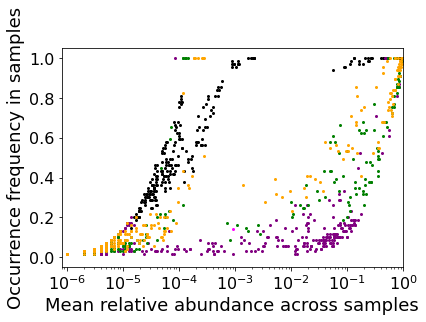

In [11]:
plotting(df_0009, df_00001, df_00001_v1, df_00005, df_0001)